In [179]:
#importamos las librerias necesarias
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import variation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [180]:
# =====================
# 2. Cargar datasets
# =====================
path = "./Dataset/"

df= pd.read_csv(path + "strava_full_data.csv")


In [181]:
df.head()

,Unnamed: 0,average_speed,max_speed,average_heartrate,max_heartrate,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count
0,0,3.142,5.3,NaN,NaN,11443.2,1:03:50,1:00:42,73.0,115.0,Run,2020-01-18T12:00:36,12
1,1,3.410,7.4,NaN,NaN,9486.0,0:48:51,0:46:22,36.1,96.9,Run,2020-01-17T19:00:58,13
2,2,3.273,4.0,NaN,NaN,8854.8,0:45:32,0:45:05,16.0,117.2,Run,2020-01-13T18:37:29,3
3,3,3.259,4.0,NaN,NaN,7717.5,0:39:35,0:39:28,10.0,131.6,Run,2020-01-10T18:36:52,2
4,4,3.222,4.0,NaN,NaN,7659.5,0:41:33,0:39:37,12.0,107.4,Run,2020-01-08T18:37:24,17


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1121 non-null   int64  
 1   average_speed         1121 non-null   float64
 2   max_speed             1121 non-null   float64
 3   average_heartrate     190 non-null    float64
 4   max_heartrate         190 non-null    float64
 5   distance              1121 non-null   float64
 6   elapsed_time          1120 non-null   object 
 7   moving_time           1120 non-null   object 
 8   total_elevation_gain  1121 non-null   float64
 9   elev_high             1072 non-null   float64
 10  type                  1121 non-null   object 
 11  start_date_local      1121 non-null   object 
 12  kudos_count           1121 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 114.0+ KB


In [183]:
df = df.drop(columns=['average_heartrate', 'max_heartrate', 'Unnamed: 0'])


In [184]:
df.isna().sum()

average_speed            0
max_speed                0
distance                 0
elapsed_time             1
moving_time              1
total_elevation_gain     0
elev_high               49
type                     0
start_date_local         0
kudos_count              0
dtype: int64

In [185]:
df.describe()

,average_speed,max_speed,distance,total_elevation_gain,elev_high,kudos_count
count,1121.000000,1121.000000,1121.000000,1121.000000,1072.000000,1121.000000
mean,3.029095,5.142908,8428.107315,240.820250,404.417071,5.365745
std,1.082123,2.610386,9412.084936,1453.707497,1072.269702,5.302631
min,0.000000,0.000000,0.000000,0.000000,-154.200000,0.000000
25%,2.481000,3.900000,3866.900000,8.000000,97.550000,1.000000
50%,3.061000,4.700000,7025.600000,31.000000,113.600000,4.000000
75%,3.361000,5.900000,9920.800000,93.000000,225.175000,9.000000
max,6.373000,29.200000,121660.000000,28620.000000,12606.800000,32.000000


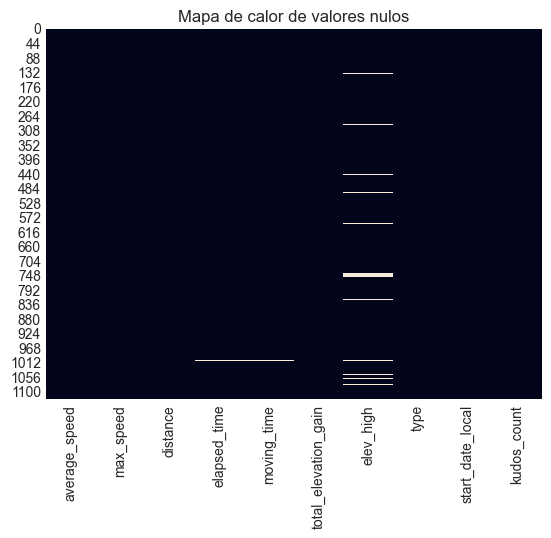

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

In [187]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'])
df['elapsed_time'] = pd.to_timedelta(df['elapsed_time']).dt.total_seconds()

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   average_speed         1121 non-null   float64       
 1   max_speed             1121 non-null   float64       
 2   distance              1121 non-null   float64       
 3   elapsed_time          1120 non-null   float64       
 4   moving_time           1120 non-null   object        
 5   total_elevation_gain  1121 non-null   float64       
 6   elev_high             1072 non-null   float64       
 7   type                  1121 non-null   object        
 8   start_date_local      1121 non-null   datetime64[ns]
 9   kudos_count           1121 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 87.7+ KB


<Axes: xlabel='type'>

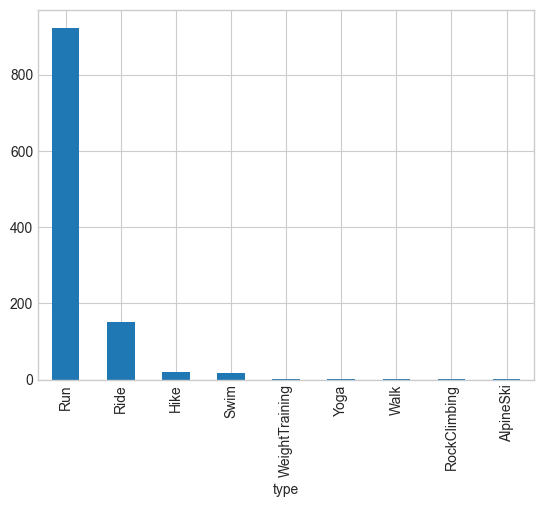

In [189]:
df['type'].value_counts().plot(kind='bar')

In [190]:
df.groupby('type')['elev_high'].apply(lambda x: x.isna().sum())

type
AlpineSki          0
Hike               4
Ride               4
RockClimbing       1
Run               18
Swim              17
Walk               1
WeightTraining     2
Yoga               2
Name: elev_high, dtype: int64

In [191]:
df = df[df['type'] == 'Run']

In [192]:
df = df.drop(columns=['type'])

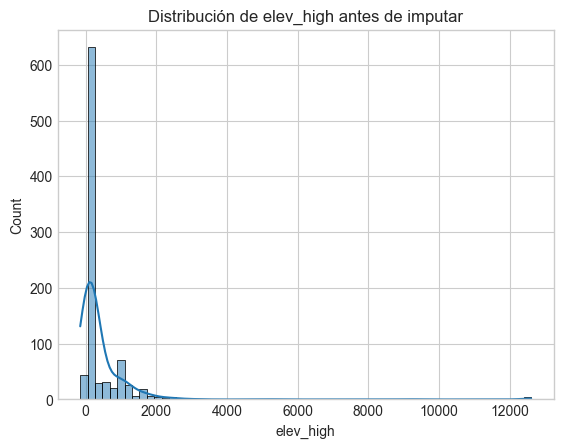

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['elev_high'], kde=True)
plt.title('Distribución de elev_high antes de imputar')
plt.show()


In [194]:
mediana_elev = df['elev_high'].median()
print("Mediana de elev_high:", mediana_elev)

df['elev_high'].fillna(mediana_elev, inplace=True)


Mediana de elev_high: 117.4


C:\Users\wladi\AppData\Local\Temp\ipykernel_13188\152875631.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['elev_high'].fillna(mediana_elev, inplace=True)


In [195]:
print("Antes:", df.shape)
df = df.dropna()
print("Después:", df.shape)
df.isna().sum()


Antes: (924, 9)
Después: (923, 9)


average_speed           0
max_speed               0
distance                0
elapsed_time            0
moving_time             0
total_elevation_gain    0
elev_high               0
start_date_local        0
kudos_count             0
dtype: int64

In [196]:
df['moving_time'] = pd.to_timedelta(df['moving_time'], errors='coerce')

In [197]:
df['moving_time_min'] = df['moving_time'].dt.total_seconds() / 60

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   average_speed         923 non-null    float64        
 1   max_speed             923 non-null    float64        
 2   distance              923 non-null    float64        
 3   elapsed_time          923 non-null    float64        
 4   moving_time           923 non-null    timedelta64[ns]
 5   total_elevation_gain  923 non-null    float64        
 6   elev_high             923 non-null    float64        
 7   start_date_local      923 non-null    datetime64[ns] 
 8   kudos_count           923 non-null    int64          
 9   moving_time_min       923 non-null    float64        
dtypes: datetime64[ns](1), float64(7), int64(1), timedelta64[ns](1)
memory usage: 79.3 KB


In [199]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['average_speed', 'max_speed', 'distance', 'elapsed_time',
       'total_elevation_gain', 'elev_high', 'kudos_count', 'moving_time_min'],
      dtype='object')

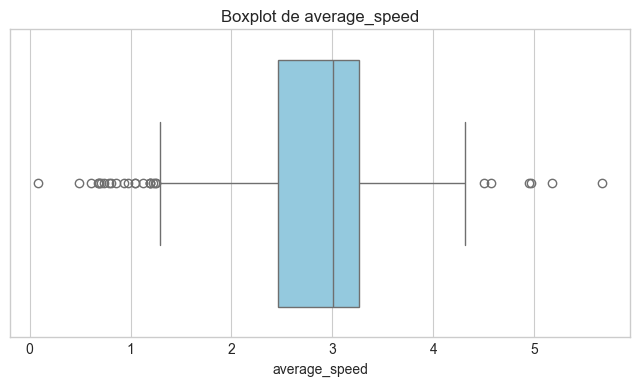

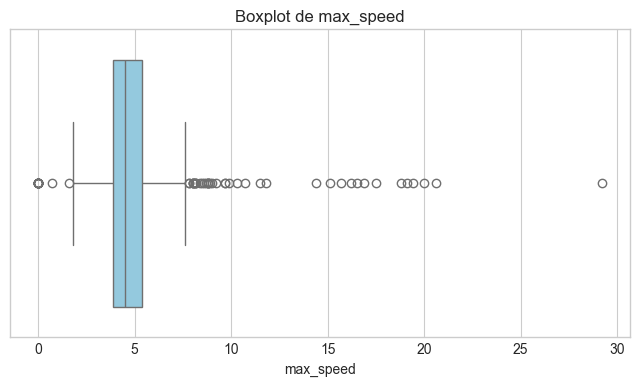

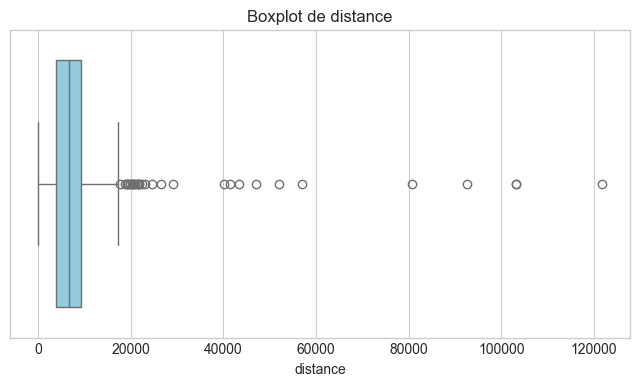

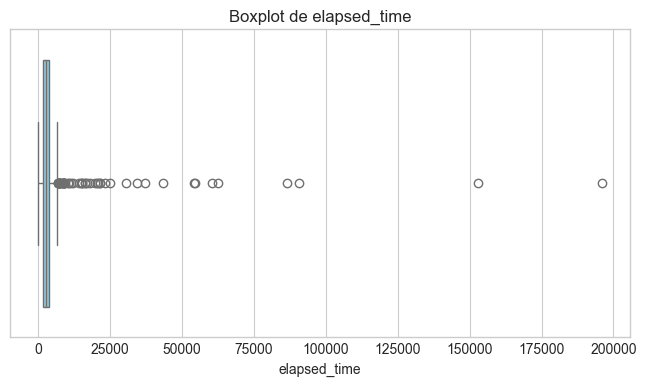

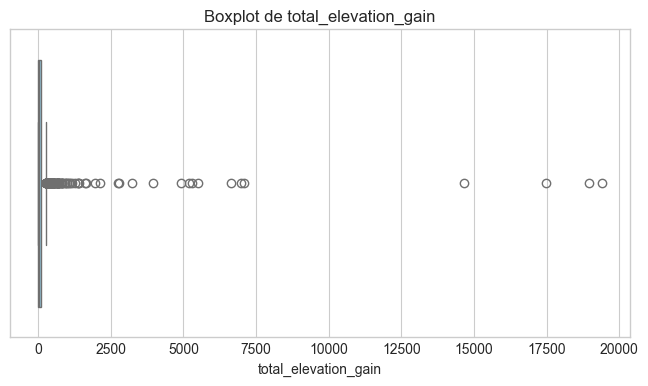

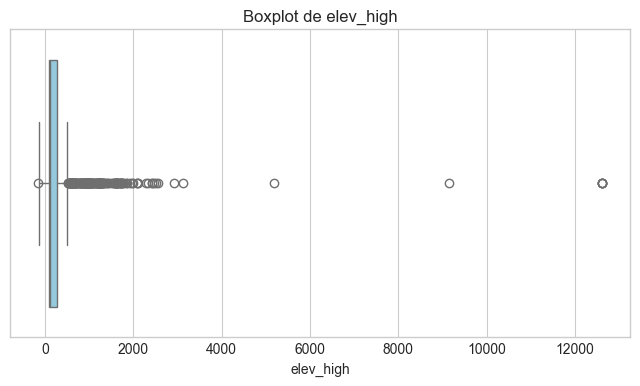

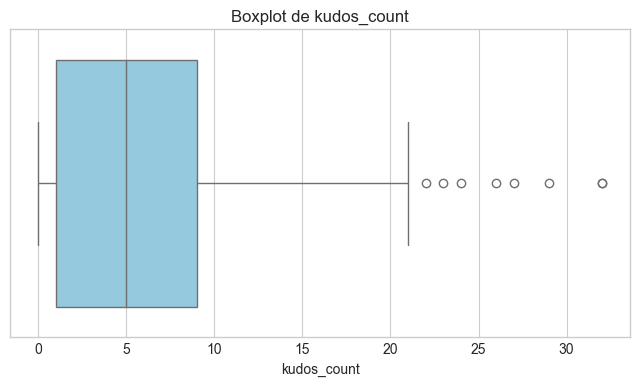

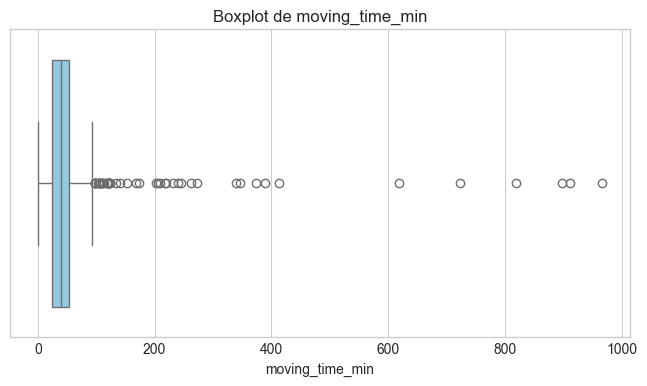

In [200]:
plt.style.use('seaborn-v0_8-whitegrid')

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()


In [201]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")


average_speed: 28 outliers
max_speed: 60 outliers
distance: 32 outliers
elapsed_time: 51 outliers
total_elevation_gain: 116 outliers
elev_high: 196 outliers
kudos_count: 8 outliers
moving_time_min: 49 outliers


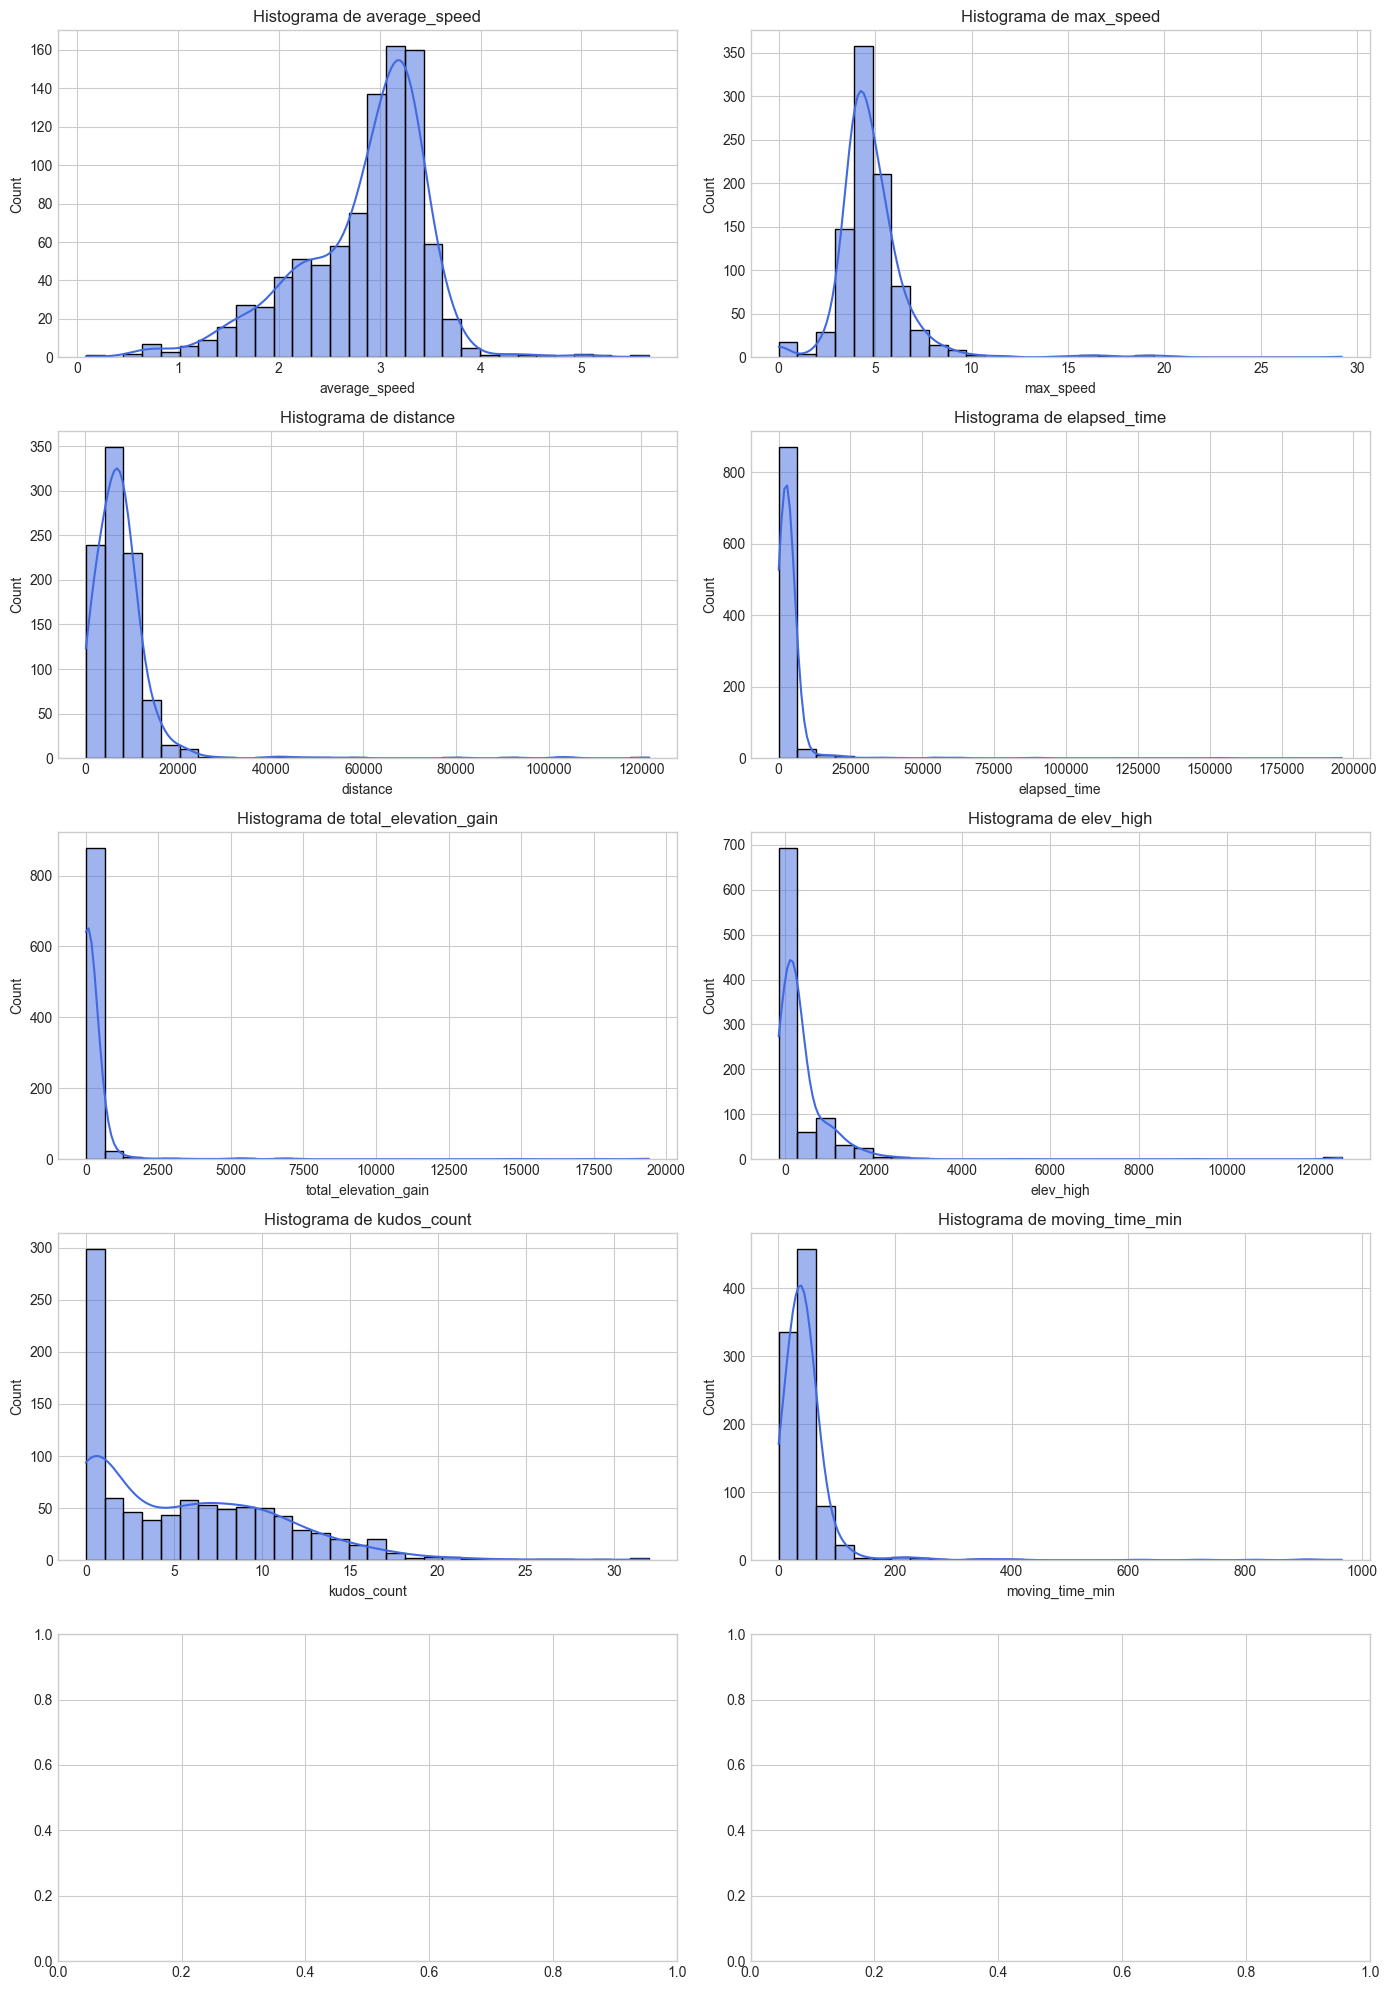

In [202]:
fig, axes = plt.subplots(nrows=len(numeric_cols)//2 + 1, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='royalblue')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


Analisis Multivariable

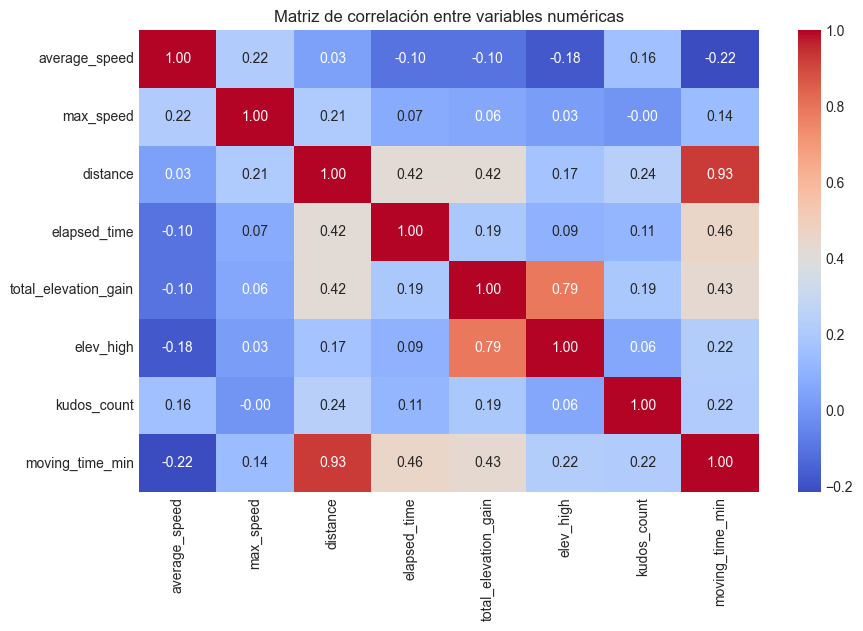

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


<Axes: xlabel='distance', ylabel='moving_time_min'>

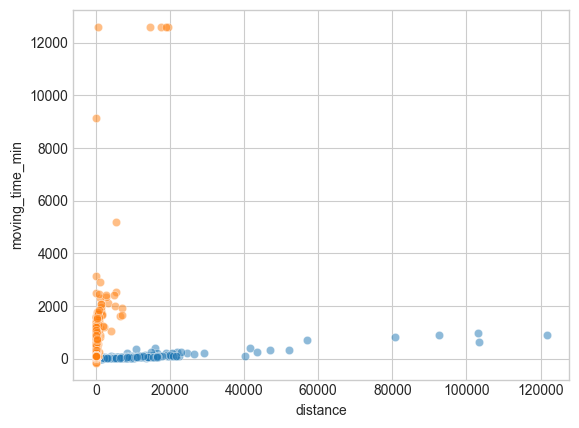

In [204]:
sns.scatterplot(data=df, x='distance', y='moving_time_min', alpha=0.5)
sns.scatterplot(data=df, x='total_elevation_gain', y='elev_high', alpha=0.5)

<Axes: xlabel='distance', ylabel='kudos_count'>

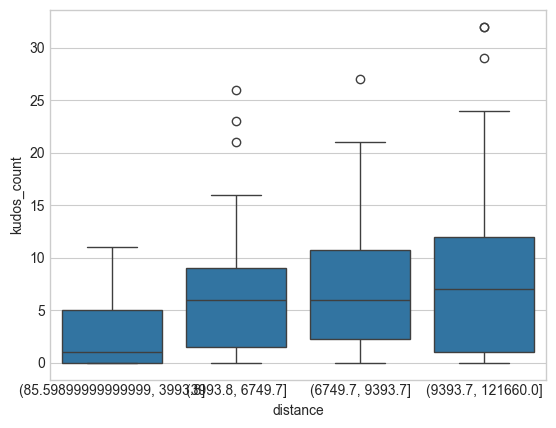

In [205]:
sns.boxplot(x=pd.qcut(df['distance'], 4), y=df['kudos_count'])


In [206]:
df = df[df['distance'] < 50000]
df = df[df['moving_time_min'] < 4000]
df = df[df['elev_high'] < 2000]

<Axes: xlabel='distance', ylabel='moving_time_min'>

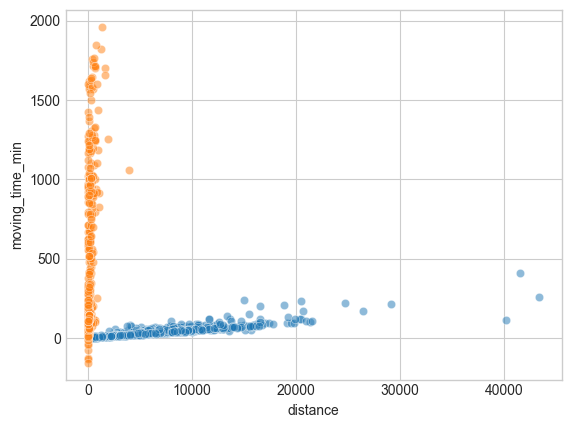

In [207]:
sns.scatterplot(data=df, x='distance', y='moving_time_min', alpha=0.5)
sns.scatterplot(data=df, x='total_elevation_gain', y='elev_high', alpha=0.5)

In [208]:
df.shape

(899, 10)

Engineering of Features

In [209]:
# Ritmo en min/km
df['pace_min_per_km'] = df['moving_time_min'] / (df['distance'] / 1000)
df.head()

,average_speed,max_speed,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,start_date_local,kudos_count,moving_time_min,pace_min_per_km
0,3.142,5.3,11443.2,3830.0,0 days 01:00:42,73.0,115.0,2020-01-18 12:00:36,12,60.700000,5.304460
1,3.410,7.4,9486.0,2931.0,0 days 00:46:22,36.1,96.9,2020-01-17 19:00:58,13,46.366667,4.887905
2,3.273,4.0,8854.8,2732.0,0 days 00:45:05,16.0,117.2,2020-01-13 18:37:29,3,45.083333,5.091401
3,3.259,4.0,7717.5,2375.0,0 days 00:39:28,10.0,131.6,2020-01-10 18:36:52,2,39.466667,5.113919
4,3.222,4.0,7659.5,2493.0,0 days 00:39:37,12.0,107.4,2020-01-08 18:37:24,17,39.616667,5.172226


In [210]:
# Eliminación de outliers en la variable 'distance'
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['distance'] >= lower) & (df['distance'] <= upper)]

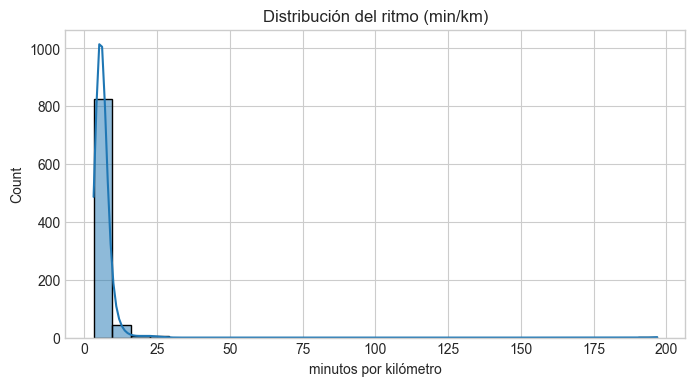

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['pace_min_per_km'], bins=30, kde=True)
plt.title('Distribución del ritmo (min/km)')
plt.xlabel('minutos por kilómetro')
plt.show()

In [212]:
df['pace_min_per_km'].describe()

count    878.000000
mean       6.476063
std        6.829101
min        3.221112
25%        5.108363
50%        5.518920
75%        6.625953
max      196.845794
Name: pace_min_per_km, dtype: float64

In [213]:
# Eliminación de outliers en la variable 'pace_min_per_km'
Q1 = df['pace_min_per_km'].quantile(0.25)
Q3 = df['pace_min_per_km'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['pace_min_per_km'] >= lower) & (df['pace_min_per_km'] <= upper)]

In [214]:
df = df[df['pace_min_per_km'] <= 15]

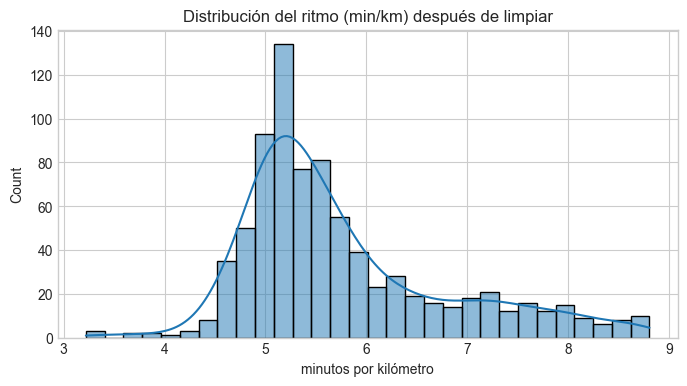

In [215]:
plt.figure(figsize=(8,4))
sns.histplot(df['pace_min_per_km'], bins=30, kde=True)
plt.title('Distribución del ritmo (min/km) después de limpiar')
plt.xlabel('minutos por kilómetro')
plt.show()


In [216]:
def categorize_pace(pace):
    if pace < 4.5:
        return 'Rápido'
    elif pace <= 6.5:
        return 'Moderado'
    else:
        return 'Lento'

df['pace_category'] = df['pace_min_per_km'].apply(categorize_pace)


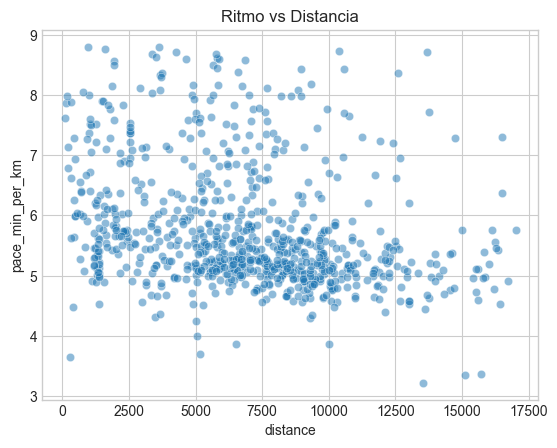

In [217]:
sns.scatterplot(data=df, x='distance', y='pace_min_per_km', alpha=0.5)
plt.title('Ritmo vs Distancia')
plt.show()


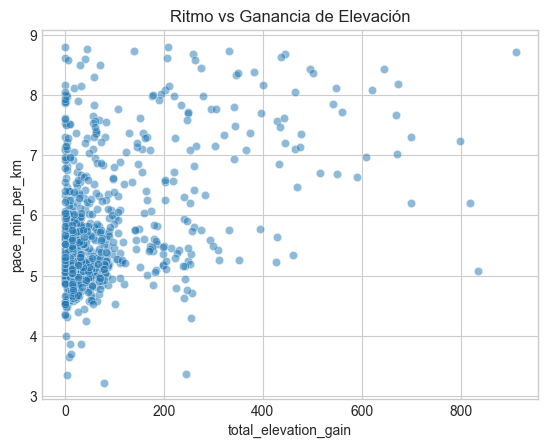

In [218]:
sns.scatterplot(data=df, x='total_elevation_gain', y='pace_min_per_km', alpha=0.5)
plt.title('Ritmo vs Ganancia de Elevación')
plt.show()


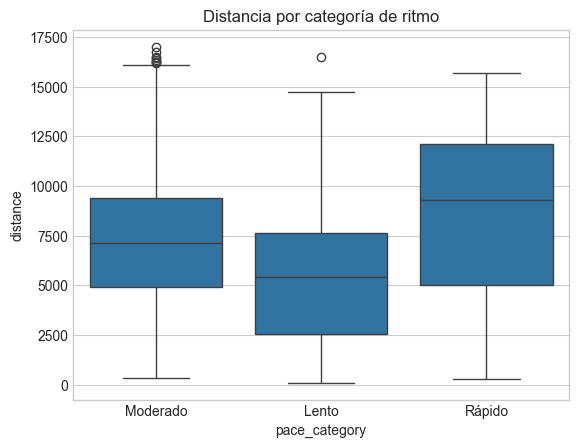

In [219]:
sns.boxplot(data=df, x='pace_category', y='distance')
plt.title('Distancia por categoría de ritmo')
plt.show()


In [220]:
# ============================================================
# 1. Calcular la ganancia de elevación por kilómetro
# ============================================================
# Convierte la elevación total en una métrica relativa a la distancia.
# Esto permite comparar actividades de diferente longitud de forma justa.
# (ej. 200 m en 5 km → 40 m/km, pendiente fuerte)
df['elev_per_km'] = df['total_elevation_gain'] / (df['distance'] / 1000)


# ============================================================
# 2. Calcular la velocidad promedio en km/h
# ============================================================
# Convierte distancia (m) a kilómetros y tiempo (min) a horas.
# Así obtenemos la velocidad promedio en km/h, una métrica más intuitiva
# para comparar actividades.
df['speed_kmh'] = (df['distance'] / 1000) / (df['moving_time_min'] / 60)


# ============================================================
# 3. Calcular un índice relativo de esfuerzo
# ============================================================
# Ajusta la velocidad en función de la dificultad del terreno (pendiente).
# A mayor pendiente, el índice baja, reflejando que mantener cierta velocidad
# cuesta más en subida que en plano.
# (Ejemplo: 10 km/h en plano vs 10 km/h en subida no es lo mismo)
df['effort_index'] = df['speed_kmh'] / (1 + df['elev_per_km'])


# ============================================================
# 4. Calcular un esfuerzo total acumulado
# ============================================================
# Multiplica la distancia por la pendiente promedio.
# Cuantifica la carga total de esfuerzo por elevación a lo largo de la ruta.
# (Ej. subir 100 m en 2 km no es igual que en 20 km)
df['effort_total'] = df['distance'] * df['elev_per_km']


# ============================================================
# 5. Crear una característica no lineal (pendiente al cuadrado)
# ============================================================
# Eleva al cuadrado la pendiente para capturar efectos no lineales:
# a medida que la pendiente aumenta, el esfuerzo real crece más rápido.
# Esto es útil si más adelante quieres usar modelos de ML.
df['elev_per_km_sq'] = df['elev_per_km'] ** 2

In [221]:
def categorize_distance(d):
    if d < 5000:
        return 'Corta'
    elif d <= 10000:
        return 'Media'
    else:
        return 'Larga'

df['distance_category'] = df['distance'].apply(categorize_distance)

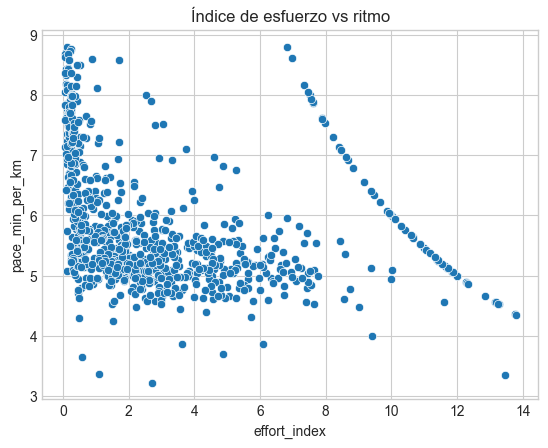

In [222]:
sns.scatterplot(data=df, x='effort_index', y='pace_min_per_km')
plt.title('Índice de esfuerzo vs ritmo')
plt.show()

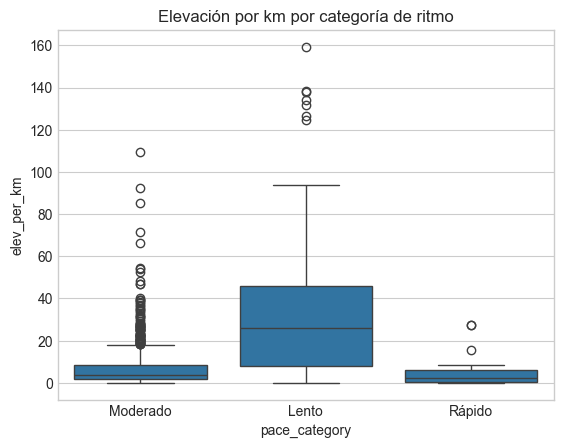

In [223]:
sns.boxplot(data=df, x='pace_category', y='elev_per_km')
plt.title('Elevación por km por categoría de ritmo')
plt.show()

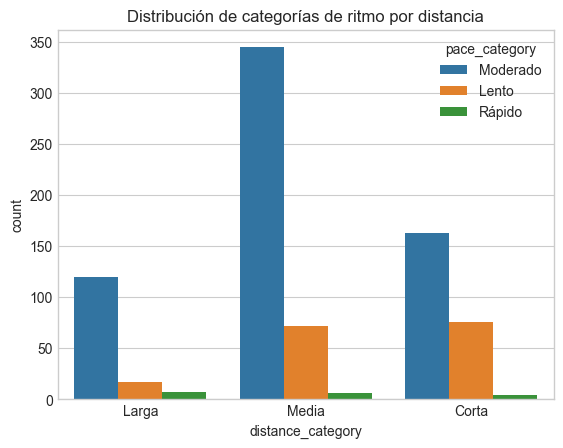

In [224]:
sns.countplot(data=df, x='distance_category', hue='pace_category')
plt.title('Distribución de categorías de ritmo por distancia')
plt.show()

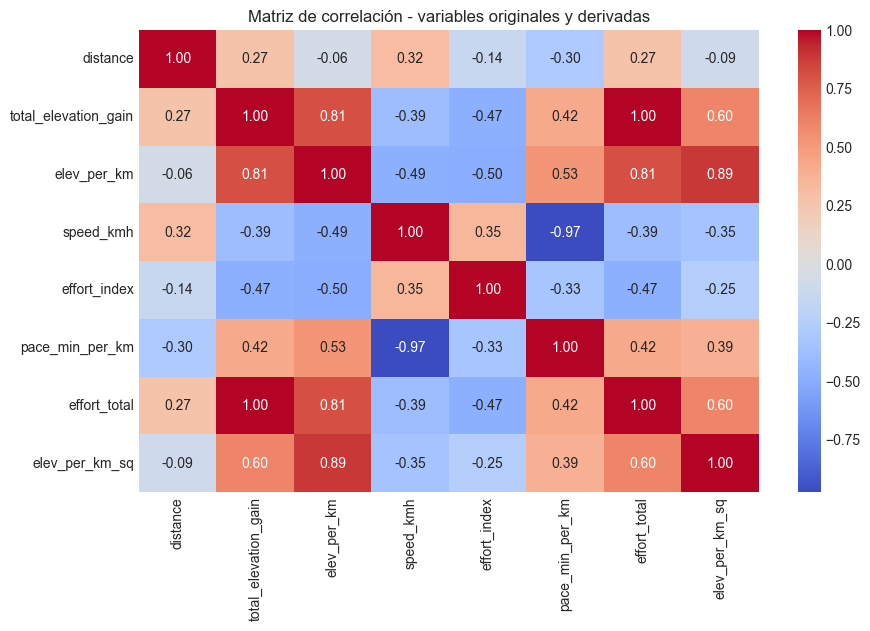

In [225]:
corr_matrix = df[['distance', 
                  'total_elevation_gain',
                  'elev_per_km',
                  'speed_kmh',
                  'effort_index',
                  'pace_min_per_km',
                  'effort_total',
                  'elev_per_km_sq']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación - variables originales y derivadas')
plt.show()


ENTRENAMIENTO

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Features y target
X = df[['distance', 'total_elevation_gain', 'elev_per_km', 'effort_index']]
y = df['pace_min_per_km']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} min/km")
print(f"R²: {r2:.3f}")


MAE: 0.53 min/km
R²: 0.445


In [227]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(coefficients)


                Feature  Coeficiente
3          effort_index    -0.053581
2           elev_per_km     0.004697
1  total_elevation_gain     0.002979
0              distance    -0.000117


In [228]:
from sklearn.preprocessing import StandardScaler

features = ['distance', 'total_elevation_gain', 'elev_per_km', 
            'effort_index', 'effort_total', 'elev_per_km_sq']

X = df[features]
y = df['pace_min_per_km']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [229]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=300, 
    max_depth=None, 
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae_rf:.2f} min/km")
print(f"Random Forest - R²: {r2_rf:.3f}")


Random Forest - MAE: 0.36 min/km
Random Forest - R²: 0.723


In [230]:
importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)


                Feature  Importance
3          effort_index    0.580453
0              distance    0.180818
5        elev_per_km_sq    0.084855
2           elev_per_km    0.082139
1  total_elevation_gain    0.036068
4          effort_total    0.035667


In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definimos la grilla de parámetros
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,  # validación cruzada
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_scaled, y)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor R² (CV): {grid_search.best_score_:.3f}")

# Entrenamos el modelo final con los mejores hiperparámetros
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Mejor R² (CV): 0.650


In [232]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='r2', n_jobs=-1)
print(f"R² promedio: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


R² promedio: 0.650 ± 0.078


In [233]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.2f} min/km")
print(f"XGBoost - R²: {r2_xgb:.3f}")


XGBoost - MAE: 0.27 min/km
XGBoost - R²: 0.838


In [234]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(
    max_iter=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

print(f"HistGradientBoosting - MAE: {mae_hgb:.2f} min/km")
print(f"HistGradientBoosting - R²: {r2_hgb:.3f}")


HistGradientBoosting - MAE: 0.27 min/km
HistGradientBoosting - R²: 0.837


In [236]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# ===============================
# 1. Definir modelo base
# ===============================
# - tree_method='hist' acelera en CPU
# - booster='gbtree' es el estándar para regresión
# - n_jobs=-1 usa todos los núcleos disponibles
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method="hist",
    booster="gbtree"
)

# ===============================
# 2. Definir grid de hiperparámetros (más pequeño y razonable)
# ===============================
# ⚠️ La versión anterior tenía 2 × 3 × 2 × 3 × 3 × 3 × 3 × 3 × 3 = 2,916 combinaciones
# Lo reducimos a un grid más manejable para evitar bloqueos
param_grid = {
    'n_estimators': [400, 800],       # menos valores → menos entrenamiento
    'max_depth': [4, 6],              # profundidad moderada
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'reg_lambda': [1.0],
    'reg_alpha': [0]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # optimiza MAE
    cv=3,                               # 3 folds es razonable
    n_jobs=-1,
    verbose=2
)

# ===============================
# 3. Entrenar GridSearch (puede tomar minutos, pero no horas)
# ===============================
grid.fit(X_train, y_train)

print("✅ Mejores hiperparámetros encontrados:")
print(grid.best_params_)
print(f"📉 Mejor MAE (CV): {-grid.best_score_:.3f}")

# ===============================
# 4. Reajustar modelo final con early stopping
# ===============================
best_params = grid.best_params_

best_xgb = XGBRegressor(
    **best_params,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
    booster='gbtree',
    early_stopping_rounds=50   # early stopping para cortar antes si no mejora
)

# early stopping usa el set de test para evaluar cada iteración
best_xgb.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

# ===============================
# 5. Evaluar modelo final
# ===============================
y_pred_best = best_xgb.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"🏁 XGBoost (Final) - MAE: {mae_best:.2f} min/km")
print(f"🏁 XGBoost (Final) - R²: {r2_best:.3f}")

# ===============================
# 6. Guardar modelo entrenado
# ===============================
import os
import joblib

# Crear carpeta 'models' si no existe
os.makedirs("models", exist_ok=True)

# Guardar el modelo en la carpeta
joblib.dump(best_xgb, "models/best_xgb_model.joblib")
print("💾 Modelo guardado en 'models/best_xgb_model.joblib'")


# ===============================
# 7. (Opcional) Número de árboles usados
# ===============================
# Si early stopping se activó, best_iteration indica cuántos árboles realmente se entrenaron
print(f"🌿 Árboles usados: {best_xgb.best_iteration}")


Fitting 3 folds for each of 128 candidates, totalling 384 fits
✅ Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 800, 'reg_alpha': 0, 'reg_lambda': 1.0, 'subsample': 0.8}
📉 Mejor MAE (CV): 0.268
🏁 XGBoost (Final) - MAE: 0.22 min/km
🏁 XGBoost (Final) - R²: 0.898
💾 Modelo guardado en 'models/best_xgb_model.joblib'
🌿 Árboles usados: 798
